In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

from sqlalchemy.sql import operators, extract
from dateutil.relativedelta import relativedelta
from sqlalchemy import and_

In [5]:
# Create_engine to connect to your sqlite database.

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables

# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [7]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table -- using CORE, pure SQL
# YOUR CODE HERE

engine.execute("SELECT * From measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table -- using CORE, pure SQL
# YOUR CODE HERE

engine.execute("SELECT * From station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

### Reflect Database and Query

In [28]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and 
# save a reference to those classes called Station and Measurement.
# View all of the classes that automap found
# Reflect Database into ORM class

Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

In [29]:
# Save references to each table
# Reflect Database into ORM class

Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
# Start a session to query the database

session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [384]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

In [385]:
# Converting str type date into datetime

recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d') 
recent_date
#type(recent_date)


datetime.datetime(2017, 8, 23, 0, 0)

In [386]:
# 12 month relativedelta

twelve_mon_rel = relativedelta(months=12)
twelve_mon_rel

relativedelta(years=+1)

In [387]:
# 12 month relativedelta

twelve_mon_rel = relativedelta(months=12)
twelve_mon_rel


relativedelta(years=+1)

In [388]:
# Query for the previous date--12 months from '2017-08-23'` using the datetime library

query_date = recent_date - twelve_mon_rel
type(query_date)
query_date

datetime.datetime(2016, 8, 23, 0, 0)

In [389]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.


results = session.query(Measurement.date, Measurement.prcp).\
        filter(and_(Measurement.date >= query_date,\
                Measurement.date <= recent_date)).\
                group_by(func.strftime("%d", Measurement.date)).\
                order_by(Measurement.date).all() 
                            
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0)]

In [390]:
# converting into dictionary

prcp_dict = {}
for row in results:
    prcp_dict[row[0]] = row[1]
prcp_dict    
                        
    

{'2016-08-24': 0.08,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': 0.0,
 '2016-08-28': 0.01,
 '2016-08-29': 0.0,
 '2016-08-30': 0.0,
 '2016-08-31': 0.13,
 '2016-09-01': 0.0,
 '2016-09-02': 0.0,
 '2016-09-03': 0.0,
 '2016-09-04': 0.03,
 '2016-09-05': None,
 '2016-09-06': None,
 '2016-09-07': 0.05,
 '2016-09-08': 0.0,
 '2016-09-09': 0.03,
 '2016-09-10': 0.0,
 '2016-09-11': 0.05,
 '2016-09-12': 0.0,
 '2016-09-13': 0.02,
 '2016-09-14': 1.32,
 '2016-09-15': 0.42,
 '2016-09-16': 0.06,
 '2016-09-17': 0.05,
 '2016-09-18': 0.0,
 '2016-09-19': 0.0,
 '2016-09-20': 0.0,
 '2016-09-21': 0.0,
 '2016-09-22': 0.02,
 '2016-09-23': 0.0}

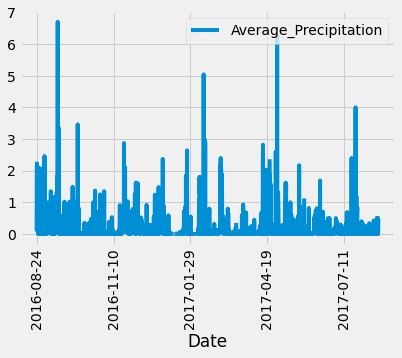

<Figure size 864x864 with 0 Axes>

In [409]:
# Convert your results into a pandas DataFrame with date as index.
# 'twelve_month_data' is a list of tuples,which doesn't have any assigned names to it, so we are assigning names to the columns

df = pd.DataFrame(twelve_month_prcp, columns=['Date', 'Average_Precipitation'])
#df['Average_Precipitation']

# Use Pandas Plotting with Matplotlib to plot the data
# to tell what the x_axis should be

df.set_index(df['Date'], inplace=True)
#df.set_index('Date', inplace=True)
#df.plot()
df.plot(rot=90)
plt.figure(figsize=(12,12))
plt.tight_layout()
#plt.savefig("../sqlalchemy-challenge/prcp.png")
plt.show()

In [392]:
# Use Pandas to calculate the summary statistics for the precipitation data

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [296]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(df['Average_Precipitation'])
print(f"The average precipitation  is {mean_numpy}")

median_numpy = np.median(df['Average_Precipitation'])
print(f"The median average precipitation is {median_numpy}")

mode_scipy = sts.mode(df['Average_Precipitation'])
print(f"The mode average precipitation is {mode_scipy}")

The average precipitation  is 0.17646153846153848
The median average precipitation is nan
The mode average precipitation is ModeResult(mode=array([0.]), count=array([873]))


# Exploratory Station Analysis

In [298]:
# Query total number of stations in dataset
total_stations = session.query(func.count(Measurement.station)).all()
total_stations

[(19550)]

In [317]:
# list of stations from the dataset.

stations_list = session.query(Measurement.station).\
                        group_by(Measurement.station).\
                        order_by(Measurement.station).all()

stations_list = list(np.ravel(stations_list))
#stations_list

In [299]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the most active stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [300]:
# Retrieving the first row of of most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).first()
active_stations

('USC00519281', 2772)

In [301]:
 # Convert list of tuples into normal list and retrieving 'station name'

greatest_num_obs = list(np.ravel(active_stations))
station_name = greatest_num_obs[0]
station_name

'USC00519281'

In [302]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
def calc_temps(station_name):
    temp_aggregations = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == station_name).all()
  
    return (temp_aggregations)

temp_aggregations = calc_temps(station_name)
temp_aggregations

[(85.0, 54.0, 71.66378066378067)]

In [331]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.

def twelve_month_calc(station_name, query_date1, recent_date):
    results = session.query(Measurement.date, Measurement.tobs).\
            filter(and_(Measurement.date >= query_date,\
                    Measurement.date <= recent_date,\
                    Measurement.station == station_name)).all()               
    
    return(results)

twelve_month_tobs = twelve_month_calc(station_name, query_date, recent_date)
twelve_month_tobs

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [360]:
tobs_dict = {}
for row in twelve_month_tobs:
    tobs_dict[row[0]] = row[1]
tobs_dict    
                        
    

{'2016-08-24': 77.0,
 '2016-08-25': 80.0,
 '2016-08-26': 80.0,
 '2016-08-27': 75.0,
 '2016-08-28': 73.0,
 '2016-08-29': 78.0,
 '2016-08-30': 77.0,
 '2016-08-31': 78.0,
 '2016-09-01': 80.0,
 '2016-09-02': 80.0,
 '2016-09-03': 78.0,
 '2016-09-04': 78.0,
 '2016-09-05': 78.0,
 '2016-09-06': 73.0,
 '2016-09-07': 74.0,
 '2016-09-08': 80.0,
 '2016-09-09': 79.0,
 '2016-09-10': 77.0,
 '2016-09-11': 80.0,
 '2016-09-12': 76.0,
 '2016-09-13': 79.0,
 '2016-09-14': 75.0,
 '2016-09-15': 79.0,
 '2016-09-16': 78.0,
 '2016-09-17': 79.0,
 '2016-09-18': 78.0,
 '2016-09-19': 78.0,
 '2016-09-20': 76.0,
 '2016-09-21': 74.0,
 '2016-09-22': 77.0,
 '2016-09-23': 78.0,
 '2016-09-24': 79.0,
 '2016-09-25': 79.0,
 '2016-09-26': 77.0,
 '2016-09-27': 80.0,
 '2016-09-28': 78.0,
 '2016-09-29': 78.0,
 '2016-09-30': 78.0,
 '2016-10-01': 77.0,
 '2016-10-02': 79.0,
 '2016-10-03': 79.0,
 '2016-10-04': 79.0,
 '2016-10-05': 79.0,
 '2016-10-06': 75.0,
 '2016-10-07': 76.0,
 '2016-10-08': 73.0,
 '2016-10-09': 72.0,
 '2016-10-10'

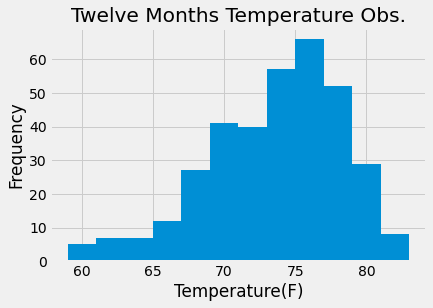

In [333]:
# Plot the results as a histogram with bins = 12
# 'twelve_month_data' is a list of tuples,which doesn't have any assigned names to it, so we are assigning names to the columns

df = pd.DataFrame(twelve_month_tobs, columns=['Date', 'Temperature'])
df.set_index(df['Temperature'], inplace=True)

plt.hist(df['Temperature'], bins=12)

plt.xlabel("Temperature(F)")
plt.ylabel("Frequency")
plt.title("Twelve Months Temperature Obs.")
plt.savefig("../sqlalchemy-challenge/Temps.png")
plt.show()



In [307]:
# Create a query that returns the minimum temperature, the average temperature,
# and the max temperature for a given start.

# put the columns what you want to see in the output in this list 

start_date = '2017-08-23'

sel = [Measurement.date,
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs),  
       func.max(Measurement.tobs)]

             
# Now query from sel data columns '
# .all() takes the result and puts into a list of tuples

start_date_aggregates = session.query(*sel).\
          filter(Measurement.date == (start_date)).all() 
                  
start_date_aggregates    

[('2017-08-23', 76.0, 80.25, 82.0)]

In [334]:
# Create a query that returns the minimum temperature, the average temperature,
# and the max temperature for a given start-end range.

# put the columns what you want to see in the output in this list 

start_date = '2015-08-23'
end_date = '2016-08-23'


sel = [func.min(Measurement.tobs), 
      func.avg(Measurement.tobs),  
       func.max(Measurement.tobs)]
             
# Now query from sel data columns '
# .all() takes the result and puts into a list of tuples

range_aggregates = session.query(*sel).\
          filter(and_(Measurement.date > start_date), (Measurement.date < end_date)).all() 
          
                  
range_aggregates    

[(56.0, 74.42747111681643, 86.0)]

In [336]:
# When given the start date only, calculate min, max, 
# and avg for all dates greater than and equal to the start date.

# put the columns what you want to see in the output in this list 

start_date = '2016-08-23'

              
sel = [func.min(Measurement.tobs), 
       func.avg(Measurement.tobs),  
       func.max(Measurement.tobs)]
       

             
# Now query from sel data columns '
# .all() takes the result and puts into a list of tuples

range_aggregates = session.query(*sel).\
          filter(Measurement.date >= start_date).all()
                           
range_aggregates    

[(58.0, 74.59058295964125, 87.0)]

In [339]:
# When given the start and the end date, calculate the minimum, average, 
# and maximum obvserved temperature for dates between the start and end date inclusive.

# you put the columns what you want to see in the output in this list 

start_date = '2015-08-23'
end_date = '2016-08-23'


sel = [func.min(Measurement.tobs), 
      func.avg(Measurement.tobs),  
      func.max(Measurement.tobs)]
       

             
# Now query from sel data columns '
# .all() takes the result and puts into a list of tuples

range_aggregates = session.query(*sel).\
          filter(and_(Measurement.date >= start_date), (Measurement.date <= end_date)).all()
          
                  
range_aggregates    

[(56.0, 74.45063829787235, 86.0)]

In [343]:
# Convert list of tuples into normal list and retrieving 'station name'

temps_filtered_by_date = list(np.ravel(range_aggregates))
temps_filtered_by_date

[56.0, 74.45063829787235, 86.0]

In [110]:
session.close()